In [14]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

In [15]:
#Initial state including number of uninfected cells (V), latently infected cells (L), actively infected
#cells (R), and free virions (E)
V0 = 4E-7
L0 = 0
R0 = 1000
E0 = 0
state = State(R = R0, L = L0, E = E0, V = V0)

,values
R,1.000000e+03
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [21]:
#Defining the system, includes each parameter as defined in the paper
#g = increase rate of uninfected cells, mu = HIV-independent death rate of uninfected cells
#t = proportion of cells activated, beta = infection rate per virion
#p = proportion of cells becoming latently infected upon infection
#alpha = latently infected cells activation rate, sigma = removal rate of cell-free virus
#delta = death rate of actively infected cells, pi = rate of production of virions
#t0 = start time (0), tf = end time (500), dt = time step (1/24)
g = 1.36
mu = 1.36E-3
t = 0.2
beta = 0.00027
p = 0.1
a = 3.6E-2
sigma = 2
d = 0.33
pi = 100
dt = 1/24
system = System(g = g, t = t, mu = mu, beta = beta, p = p, a = a, d = d, pi = pi, sigma = sigma, t0 = 0, tf = 2880, dt = dt)

,values
g,1.360000
t,0.200000
mu,0.001360
beta,0.000270
p,0.100000
a,0.036000
d,0.330000
pi,100.000000
sigma,2.000000
t0,0.000000


In [22]:
#Runs the simulation, updating the state and inputting each state into a time frame.
def runsimulation(system):
    frame = TimeFrame(columns = state.index)
    frame.row[system.t0] = state
    for t in linrange(system.t0, system.tf):
        frame.row[t+1] = update(system,frame.row[t])
    return frame

In [23]:
#Updates each state. Each differential equation corresponding to each group tracked is approximately
#integrated over the time interval, in this case an hour. This change is added to the previous values.
#The function returns a new state with the updated variables.

def update(system, state):
    unpack(system)
    R1 = ((g*t) - (mu*state.R) - (beta*state.R*state.V))*(dt) + state.R
    L1 = ((p*beta*state.R*state.V) - (mu*state.L) - (a*state.L))*(dt) + state.L
    E1 = (((1-p)*beta*state.R*state.V) + (a*state.L) - (d*state.E))*(dt) + state.E
    V1 = ((pi*E1) - (sigma*state.V))*(dt) + state.V
    return State(R = R1, L = L1, E = E1, V = V1)

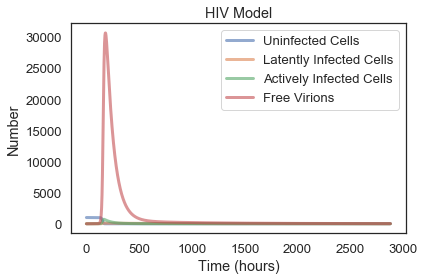

In [24]:
#Records the data frame and plots the values over time.
data = runsimulation(system)
plot(data.index, data['R'], label = 'Uninfected Cells')
plot(data.index, data['L'], label = 'Latently Infected Cells')
plot(data.index, data['E'], label = 'Actively Infected Cells')
plot(data.index, data['V'], label = 'Free Virions')
decorate(title = 'HIV Model', xlabel = 'Time (hours)', ylabel = 'Number')

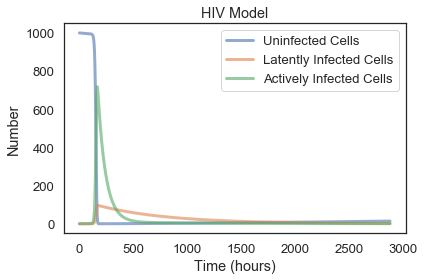

In [25]:
#Plots only R, L, and E for clarity.
plot(data.index, data['R'], label = 'Uninfected Cells')
plot(data.index, data['L'], label = 'Latently Infected Cells')
plot(data.index, data['E'], label = 'Actively Infected Cells')
decorate(title = 'HIV Model', xlabel = 'Time (hours)', ylabel = 'Number')